In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('revenue_prediction.csv')
df

# Whenever we have to predict continuous values we will use Regression Model


# If you find numeric independent columns (with continuous values) go with linear regression model.


,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715
...,...,...,...,...,...,...,...,...
95,196,Wetzel'sPretzels,No,Italian/Pizza,Bengaluru,19,1.1,1270499
96,197,LaMadeleineCountryFrenchCafe,Yes,Varied Menu,Bengaluru,75,6.3,6412623
97,198,Giordano's,Yes,Varied Menu,Gurugram,77,6.2,6694797
98,199,IslandsFineBurgers&Drinks,Yes,Sports Bar,Pune,25,2.1,2344689


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            100 non-null    int64  
 1   Name          100 non-null    object 
 2   Franchise     100 non-null    object 
 3   Category      100 non-null    object 
 4   City          100 non-null    object 
 5   No_Of_Item    100 non-null    int64  
 6   Order_Placed  100 non-null    float64
 7   Revenue       100 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 6.4+ KB


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.drop(columns=['Id','Name'],inplace=True)
# ID and Name will not contribute in predicting revenue.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le =LabelEncoder()
for x in df.columns:
    if df[x].dtype=='object':
        df[x] = le.fit_transform(df[x])
df

,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,1,12,0,55,5.5,5953753
1,0,19,1,72,6.8,7223131
2,1,5,4,25,1.9,2555379
3,1,11,2,18,2.5,2175511
4,1,13,3,48,4.2,4816715
...,...,...,...,...,...,...
95,0,11,0,19,1.1,1270499
96,1,19,0,75,6.3,6412623
97,1,19,1,77,6.2,6694797
98,1,17,4,25,2.1,2344689


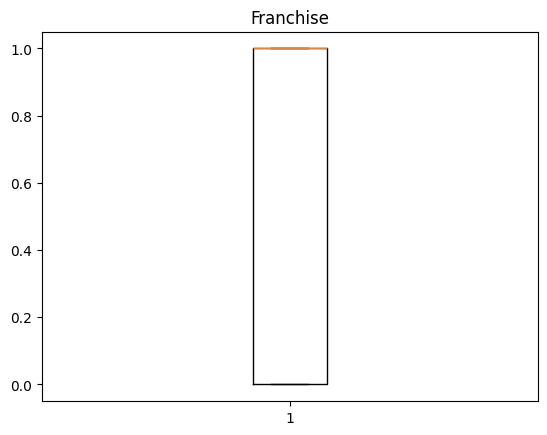

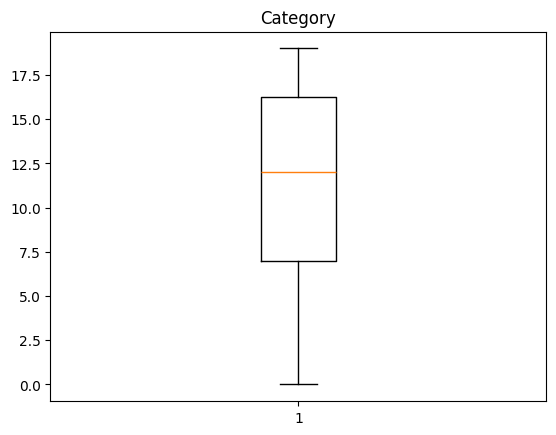

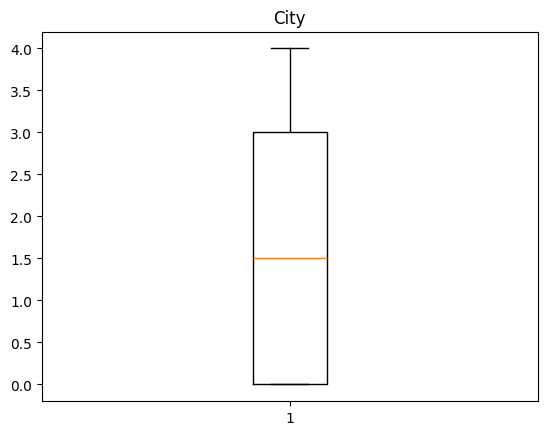

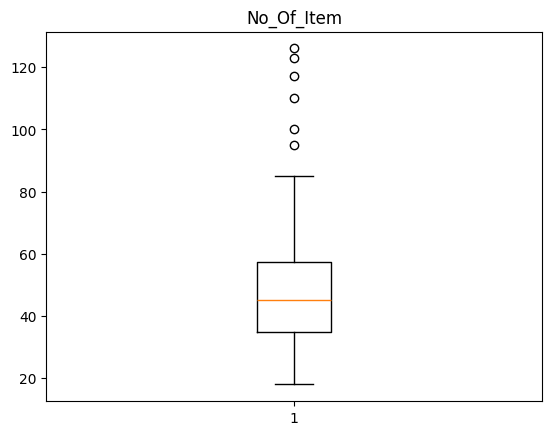

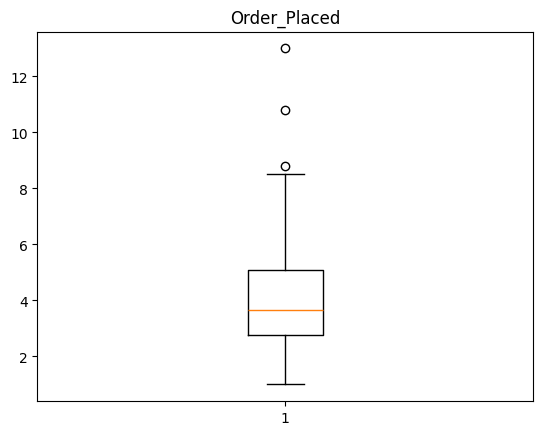

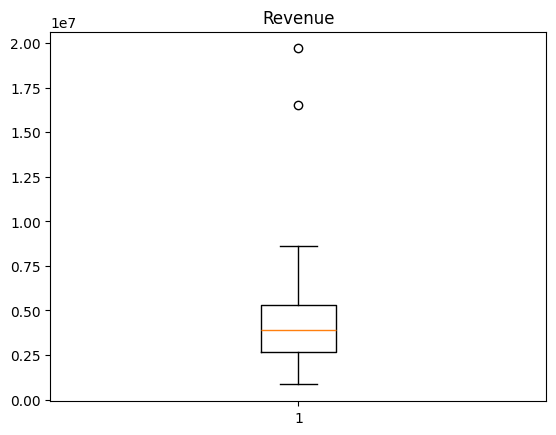

In [ ]:
for x in df.columns:
    if df[x].dtype!='object':  #Selecting all numerical columns.
        plt.boxplot(df[x])
        plt.title(x)
        plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
X = df.iloc[ : , :-1]  #Storing all independent columns.
y = df['Revenue']

In [ ]:
X

,Franchise,Category,City,No_Of_Item,Order_Placed
0,1,12,0,55,5.5
1,0,19,1,72,6.8
2,1,5,4,25,1.9
3,1,11,2,18,2.5
4,1,13,3,48,4.2
...,...,...,...,...,...
95,0,11,0,19,1.1
96,1,19,0,75,6.3
97,1,19,1,77,6.2
98,1,17,4,25,2.1


In [ ]:
y

,Revenue
0,5953753
1,7223131
2,2555379
3,2175511
4,4816715
...,...
95,1270499
96,6412623
97,6694797
98,2344689


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size = 0.8,random_state=42)

In [ ]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr_model.predict(x_test)
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_pred,y_test)

0.9026152128061055